# INF518 Artificial Intelligence / Lab
## Reinforcement Learning

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [2]:
epsilon = 0.001
gamma = 0.99                                                                   # Discount factor
A = np.array(['N','S','E','W'])                                                   # Set of actions
S = np.array([[1,1],[1,2],[1,3],[1,4],[2,1],[2,3],[2,4],[3,1],[3,2],[3,3],[3,4]]) # [2,2] is not possible
A,S.shape

(array(['N', 'S', 'E', 'W'], dtype='<U1'), (11, 2))

In [3]:
def R(s):
    if(np.array_equal(s,[3,4])):
        r = 1
    elif(np.array_equal(s,[2,4])):
        r = -1
    else:
        r = -0.02
    return r

In [4]:
def row_col(s):      # Return a pair of coordinates for a given state ex: [2,1] -> 2,1
    return s[0],s[1]

In [5]:
def next_states(s):                      # Return possible next states (surrounding cells)
    row,col = row_col(s)  
    return np.array([[row+1,col],[row-1,col],[row,col+1],[row,col-1]]).astype(int)

In [6]:
def Psa(s,a,s_nxt):                  # Return the probability that the Agent at state s end up on a state s_nxt by performing an action a
    row,col = row_col(s)             # Current state coordinates
    row_nxt,col_nxt = row_col(s_nxt) # Objective state coordinates
    if (a == 'N'):
        if(row+1 == row_nxt):        # Action North going to North cell
            p = 0.8
        elif(row-1 == row_nxt):      # Action North going to South cell
            p = 0
        else:
            p = 0.1
    elif (a == 'S'):
        if(row-1 == row_nxt):        # Action South going to South cell
            p = 0.8
        elif(row+1 == row_nxt):      # Action South going to North cell
            p = 0
        else:
            p = 0.1
    elif (a == 'E'):
        if(col+1 == col_nxt):        # Action East going to East cell
            p = 0.8
        elif(col-1 == col_nxt):      # Action East going to West cell
            p = 0
        else:
            p = 0.1
    else:
        if(col-1 == col_nxt):        # Action West going to West cell
            p = 0.8
        elif(col+1 == col_nxt):      # Action West going to East cell
            p = 0
        else:
            p = 0.1
    return p

In [7]:
def display_functions(V,pi):
    fig, ax = plt.subplots()
    ax.matshow(V, cmap=plt.cm.Blues)
    fig.gca().invert_yaxis()
    for i in range(V.shape[0]):
        for j in range(V.shape[1]):
            ax.text(j, i, pi[i,j], va='center', ha='center')

In [8]:
def display_V(V):
    fig, ax = plt.subplots()
    ax.matshow(V, cmap=plt.cm.Blues)
    fig.gca().invert_yaxis()

### 1) For all states, find the optimal value function V∗(s) and the optimal policy function π∗(s) using the value iteration algorithm.

In [9]:
def converged(V,V_old,epsilon):
    delta = np.absolute(V - V_old)      # Calculate each differences
    if (np.sum(delta >= epsilon) == 0): # Check if all differences > epsilon
        return True                    # Each values have not changed significally since last update
    else:
        return False                    # Some values have changed significally

In [10]:
def value_iteration_algorithm(V,epsilon,gamma,S,A):
    V_old = np.zeros((3,4))
    i = 0
    while(converged(V,V_old,epsilon) == False ):                             # While the value function hasn't converged
        i +=1
        display_V(V)
        V_old = np.copy(V)
        for s in S:
            if(not np.array_equal(s,[3,4]) and not np.array_equal(s,[2,4])): # If state is not a final state
                row,col = row_col(s)                                         #   Get state coordinate
                V_tot = []
                S_nxt = next_states(s)                                       #   Get nearby cells
                for a in A:                                                  #   For every actions
                    V_a = 0                                                  #     Sum of values for an action
                    for s_nxt in S_nxt:                                      #       For every next states
                        row_nxt,col_nxt = row_col(s_nxt)                     #         Get next state coordinates
                        if(any(np.array_equal(s_nxt, s) for s in S)):        #         if it is included in possible states S
                            V_a += Psa(s,a,s_nxt)*V[row_nxt-1,col_nxt-1]     #           update Value with next state value function
                        else:                                                #         if it is outside the possible states S
                            V_a += Psa(s,a,s_nxt)*V[row-1,col-1]             #           update values with current state value function ( the agent hasn't moved)
                    V_tot = np.append(V_tot,V_a)                             #     add value result of every actions
                V[row-1,col-1] = R(s) + gamma*np.amax(V_tot)                 #   update value of current state with biggest value amongst actions
    print('iterations = ',i)
    return V

### Initialize Value function

In [11]:
V = np.zeros((3,4))
V[2,3] = 1
V[1,3] = -1
V

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  1.]])

### Run value iteration algorithm

iterations =  14


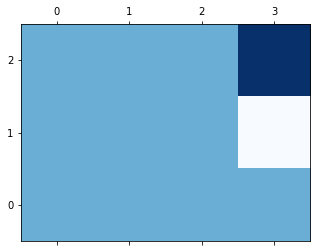

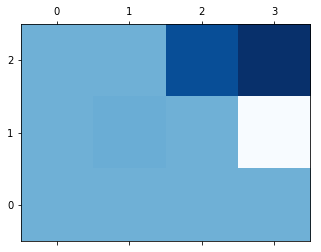

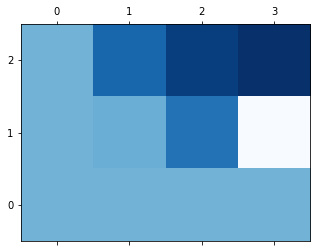

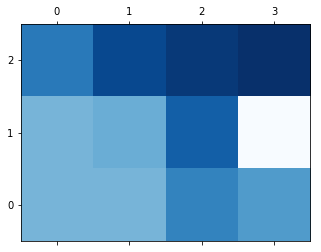

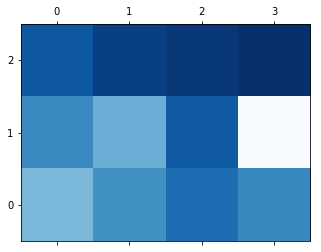

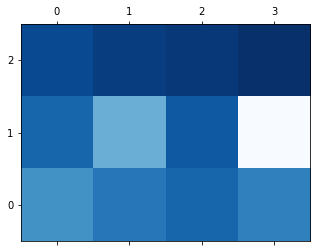

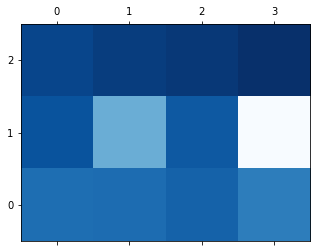

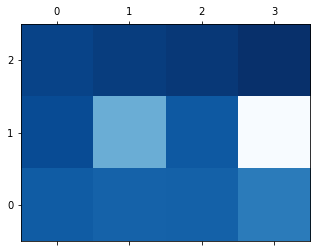

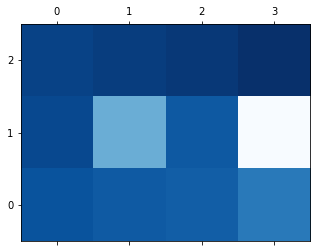

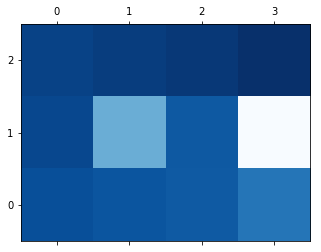

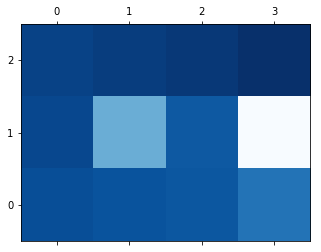

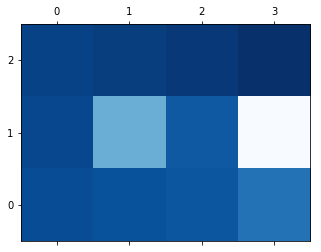

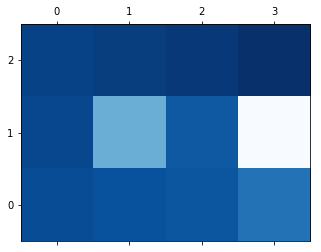

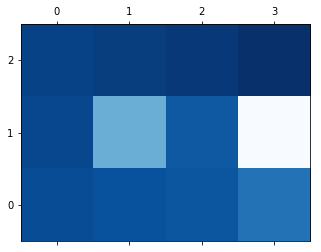

In [12]:
V = value_iteration_algorithm(V,epsilon,gamma,S,A)

### Display optimized Value function

In [13]:
V

array([[ 0.78011313,  0.74533707,  0.70845873,  0.49061977],
       [ 0.81968415,  0.        ,  0.68749633, -1.        ],
       [ 0.85529895,  0.89580322,  0.93236641,  1.        ]])

### Compute policy

In [14]:
pi = np.random.choice(A, (3,4))
pi

array([['N', 'S', 'W', 'S'],
       ['W', 'W', 'W', 'N'],
       ['E', 'N', 'N', 'S']], dtype='<U1')

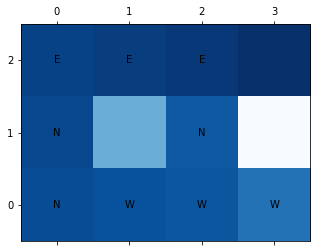

In [15]:
for s in S:
    S_nxt = next_states(s)
    values = []
    for s_nxt in S_nxt:
        if(any(np.array_equal(s_nxt, s) for s in S)):
            row_nxt,col_nxt = row_col(s_nxt)
            values = np.append(values, V[row_nxt-1,col_nxt-1])
        else:
            values = np.append(values,-2)
    a = np.argmax(values)
    row,col = row_col(s)
    if(a == 0):
        pi[row-1,col-1] = 'N'
    elif(a == 1):
        pi[row-1,col-1] = 'S'
    elif(a == 2):
        pi[row-1,col-1] = 'E'
    else:
        pi[row-1,col-1] = 'W'
pi[2,3] = ' '
pi[1,3] = ' '
pi[1,1] = ' '
display_functions(V,pi)

### 2) For all states, find the optimal value function V∗(s) and the optimal policy function π∗(s) using the policy iteration algorithm.

In [16]:
def converged_2(pi,pi_old):
    if (np.array_equal(pi,pi_old)):     
        return True                 # No values have changed since last update
    else:
        return False                # Some values have changed significally

In [17]:
def policy_iteration_algorithm(pi,gamma,V,S,A):
    V_old = np.zeros((3,4))
    i=0
    while(converged(V,V_old,epsilon) == False ):
        i+=1
        display_functions(V,pi)
        # Update V
        V_old = np.copy(V)
        for s in S:
            if(not np.array_equal(s,[3,4]) and not np.array_equal(s,[2,4])):
                row,col = row_col(s)
                S_nxt = next_states(s)
                Sum = 0
                for s_nxt in S_nxt:                                         #       For every next states
                    row_nxt,col_nxt = row_col(s_nxt)                        #         Get next state coordinates
                    if(any(np.array_equal(s_nxt, s) for s in S)):           #         if it is included in possible states S
                        Sum += Psa(s,pi[row-1,col-1],s_nxt)*V[row_nxt-1,col_nxt-1]     #           update Value with next state value function
                    else:                                                   #         if it is outside the possible states S
                        Sum += Psa(s,pi[row-1,col-1],s_nxt)*V[row-1,col-1]
                V[row-1,col-1] = R(s)+gamma*Sum
        
        # Update pi
        for s in S:
            if(not np.array_equal(s,[3,4]) and not np.array_equal(s,[2,4])):
                row,col = row_col(s)
                S_nxt = next_states(s)                                       #   Get nearby cells
                V_tot = []
                for a in A:                                                  #   For every actions
                    V_a = 0                                                  #     Sum of values for an action
                    for s_nxt in S_nxt:                                      #       For every next states
                        row_nxt,col_nxt = row_col(s_nxt)                     #         Get next state coordinates
                        if(any(np.array_equal(s_nxt, s) for s in S)):        #         if it is included in possible states S
                            V_a += Psa(s,a,s_nxt)*V[row_nxt-1,col_nxt-1]     #           update Value with next state value function
                        else:                                                #         if it is outside the possible states S
                            V_a += Psa(s,a,s_nxt)*V[row-1,col-1]             #           update values with current state value function ( the agent hasn't moved)
                    V_tot = np.append(V_tot,V_a)
                pi_s = np.argmax(V_tot)
                if(pi_s == 0):
                    pi[row-1,col-1] = 'N'
                elif(pi_s == 1):
                    pi[row-1,col-1] = 'S'
                elif(pi_s == 2):
                    pi[row-1,col-1] = 'E'
                else:
                    pi[row-1,col-1] = 'W'
                pi[2,3] = ' '
                pi[1,3] = ' '
                pi[1,1] = ' '
    print('iterations = ',i)
    return V,pi

In [18]:
pi = np.random.choice(A, (3,4))
pi[2,3] = ' '
pi[1,3] = ' '
pi[1,1] = ' '

In [19]:
V = np.zeros((3,4))
V[2,3] = 1
V[1,3] = -1

iterations =  15


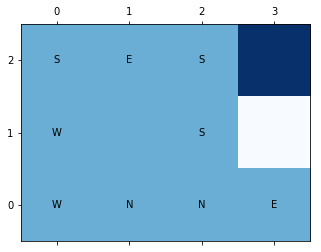

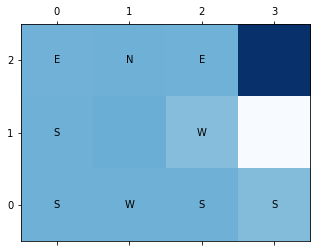

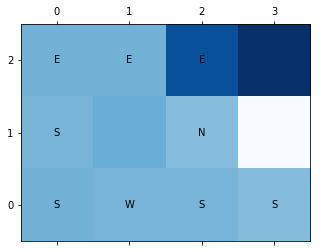

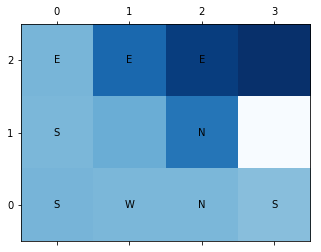

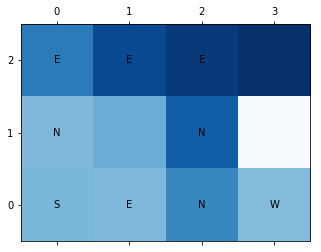

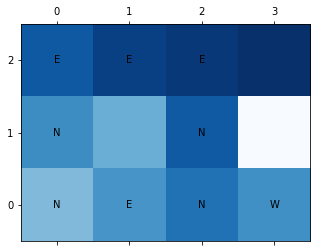

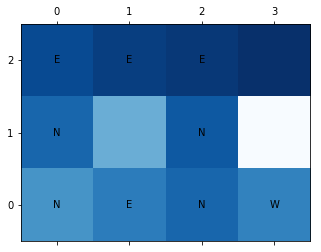

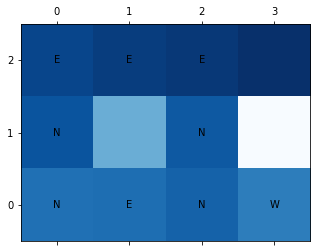

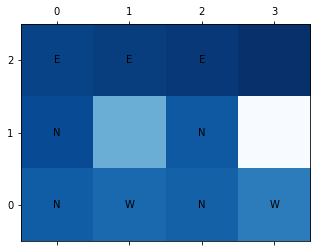

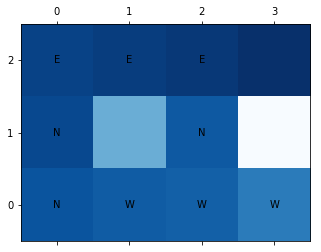

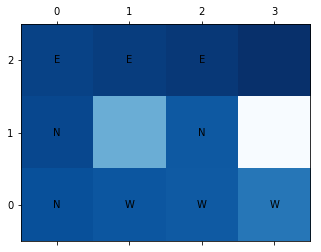

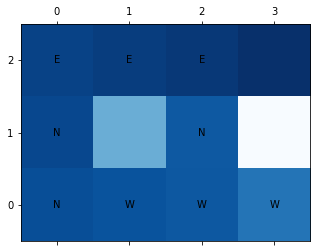

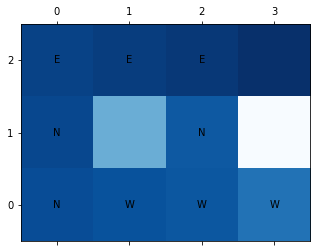

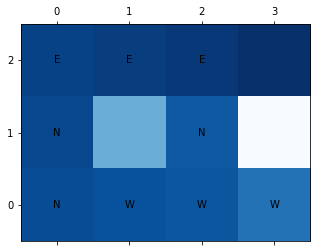

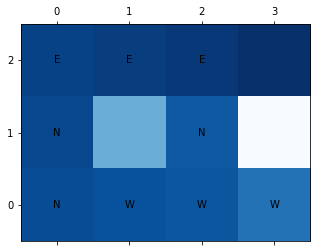

In [20]:
V,pi = policy_iteration_algorithm(pi,gamma,V,S,A)

In [21]:
pi

array([['N', 'W', 'W', 'W'],
       ['N', ' ', 'N', ' '],
       ['E', 'E', 'E', ' ']], dtype='<U1')

In [22]:
V

array([[ 0.78009917,  0.74531134,  0.70843026,  0.4905883 ],
       [ 0.81968309,  0.        ,  0.68749633, -1.        ],
       [ 0.85529879,  0.89580322,  0.93236641,  1.        ]])

### 3) Compare the results obtained in 1) to those of 2).

1) Takes 14 iterations  
2) Takes 15 iterations

If the number of states is less than 1000, then the 2) is preferred, but if the number of states is more than this value, then the 1) is preferred.